In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train data from csv file
a_mpg= pd.read_csv('auto-mpg.data.csv', sep="\s+", header=None)
a_mpg.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'model']
a_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


###### Performing EDA

In [3]:
# checking shape of data
a_mpg.shape

(398, 9)

In [4]:
# checking data type
a_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
model            object
dtype: object

In [5]:
#checking unique value in each row
a_mpg.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
model           305
dtype: int64

In [6]:
a_mpg=a_mpg.drop(['model'], axis=1)

In [7]:
# replacing all '?' values with nan values in train and test data
a_mpg = a_mpg.replace('?', np.nan)

In [8]:
# checking null value
a_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
a_mpg['horsepower'].fillna(a_mpg['horsepower'].mode()[0], inplace=True)

In [10]:
a_mpg['horsepower']=a_mpg['horsepower'].astype(float)

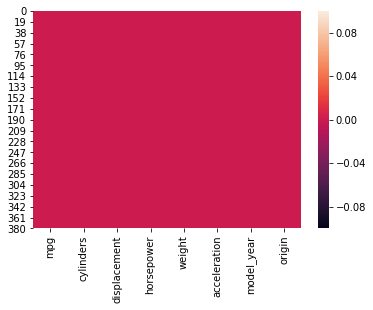

In [11]:
# heatmap of null value
sns.heatmap(a_mpg.isnull())

In [12]:
# checking the data description
a_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
# corelation between coloums
a_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.454271
weight,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,1.000000


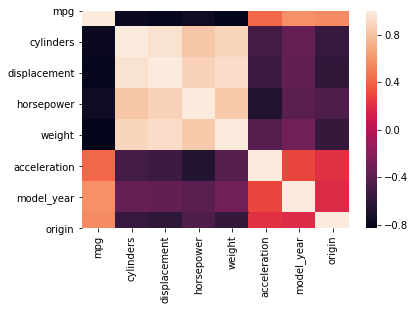

In [14]:
# heat map of corelation
sns.heatmap(a_mpg.corr())

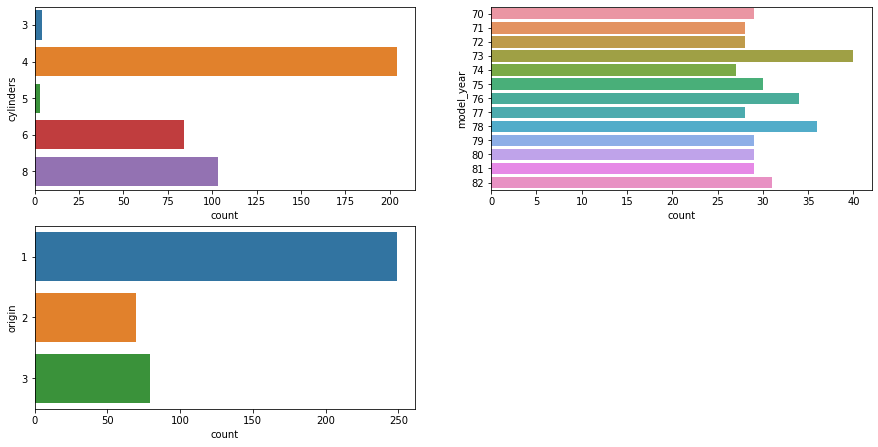

In [15]:
#creating barplot of colums to check the count of indivisual value
Index=a_mpg[['cylinders','model_year','origin']]
figure(num=None,figsize=(15,80))
for column_index,col in enumerate(Index.columns):
    plt.subplot(20,2,column_index+1)
    sns.countplot(y=Index[col],data=Index)

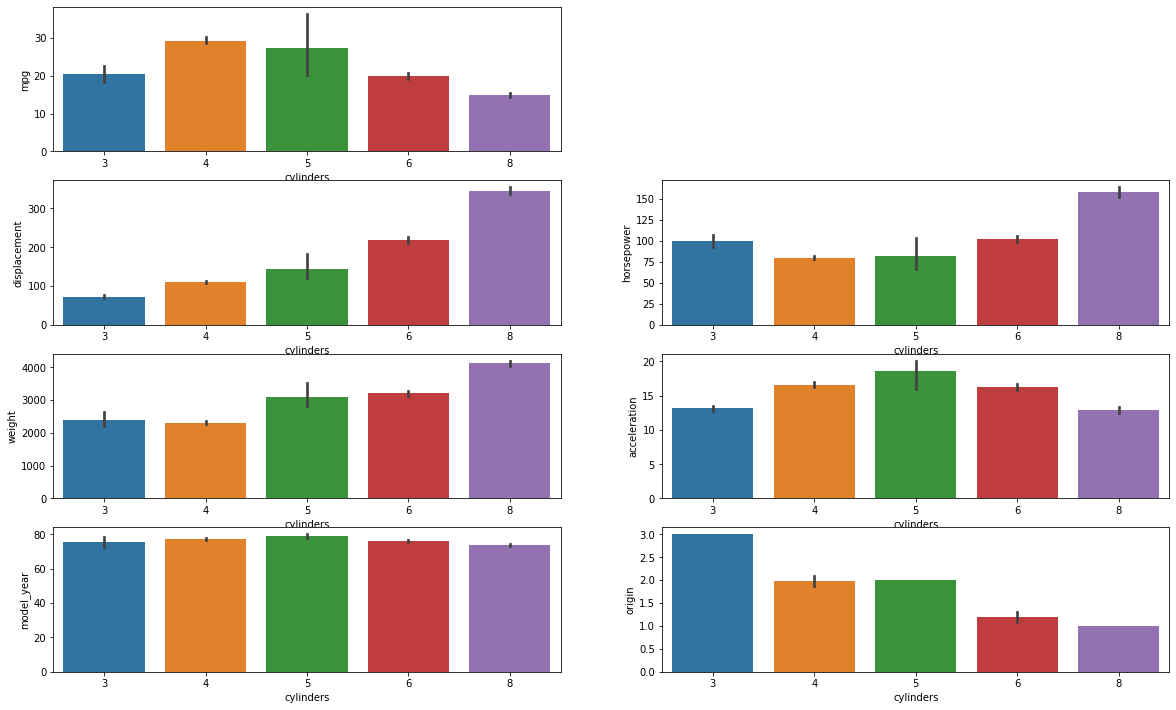

In [16]:
# creating bar plot of colums with respect to Gender to check distribution among Gender
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(a_mpg.columns):
    if column == 'cylinders':
        continue
    plt.subplot(8, 2, column_index+1)
    
    sns.barplot(x='cylinders', y=column, data=a_mpg)

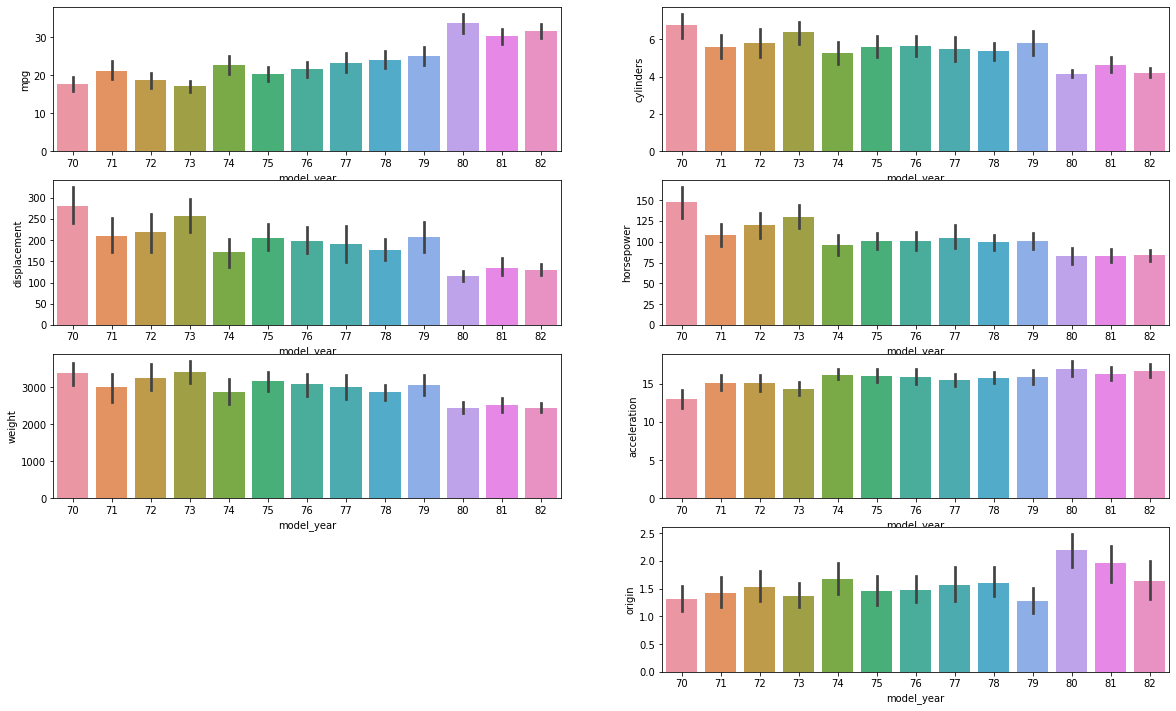

In [17]:
# creating bar plot of colums with respect to Gender to check distribution among Gender
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(a_mpg.columns):
    if column == 'model_year':
        continue
    plt.subplot(8, 2, column_index+1)
    
    sns.barplot(x='model_year', y=column, data=a_mpg)

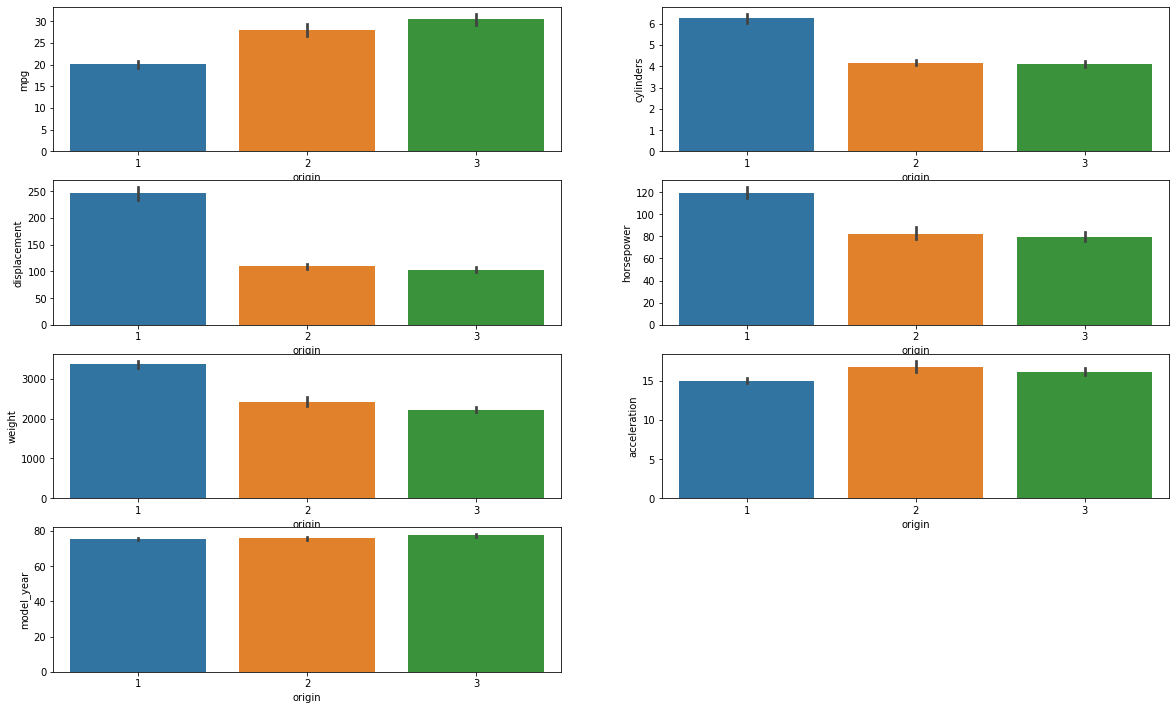

In [18]:
# creating bar plot of colums with respect to Gender to check distribution among Gender
figure(num=None,figsize=(20,25))
for column_index, column in enumerate(a_mpg.columns):
    if column == 'origin':
        continue
    plt.subplot(8, 2, column_index+1)
    
    sns.barplot(x='origin', y=column, data=a_mpg)

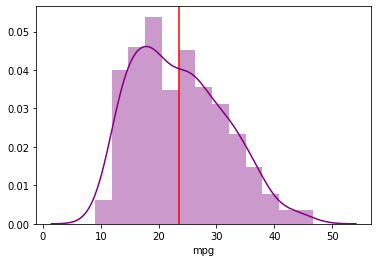

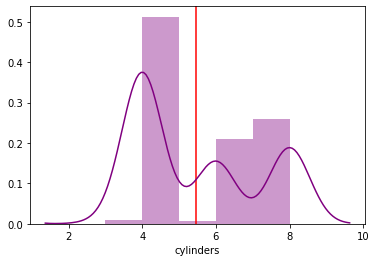

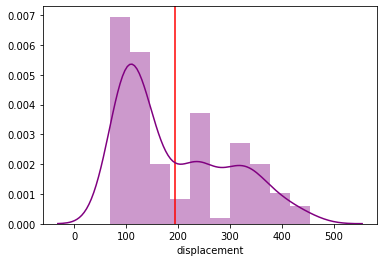

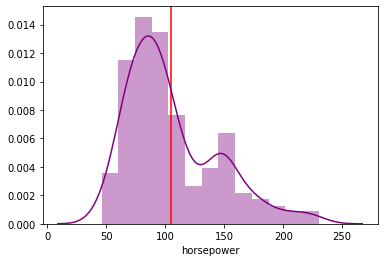

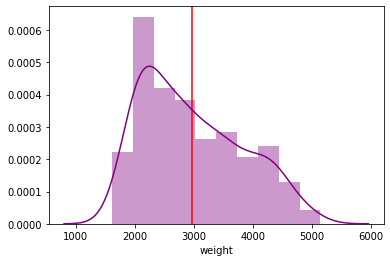

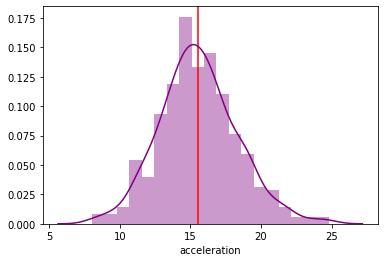

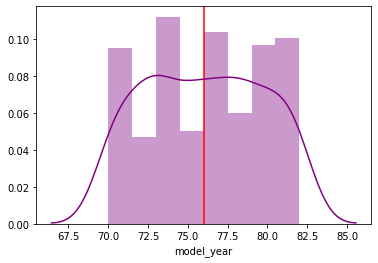

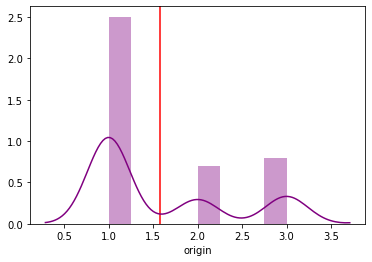

In [19]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(a_mpg):
    plt.figure(i)
    plt.axvline(a_mpg[col].mean(),color = 'r')
    sns.distplot(a_mpg[col],color='purple')

mpg                AxesSubplot(0.125,0.772143;0.227941x0.107857)
cylinders       AxesSubplot(0.398529,0.772143;0.227941x0.107857)
displacement    AxesSubplot(0.672059,0.772143;0.227941x0.107857)
horsepower         AxesSubplot(0.125,0.642714;0.227941x0.107857)
weight          AxesSubplot(0.398529,0.642714;0.227941x0.107857)
acceleration    AxesSubplot(0.672059,0.642714;0.227941x0.107857)
model_year         AxesSubplot(0.125,0.513286;0.227941x0.107857)
origin          AxesSubplot(0.398529,0.513286;0.227941x0.107857)
dtype: object

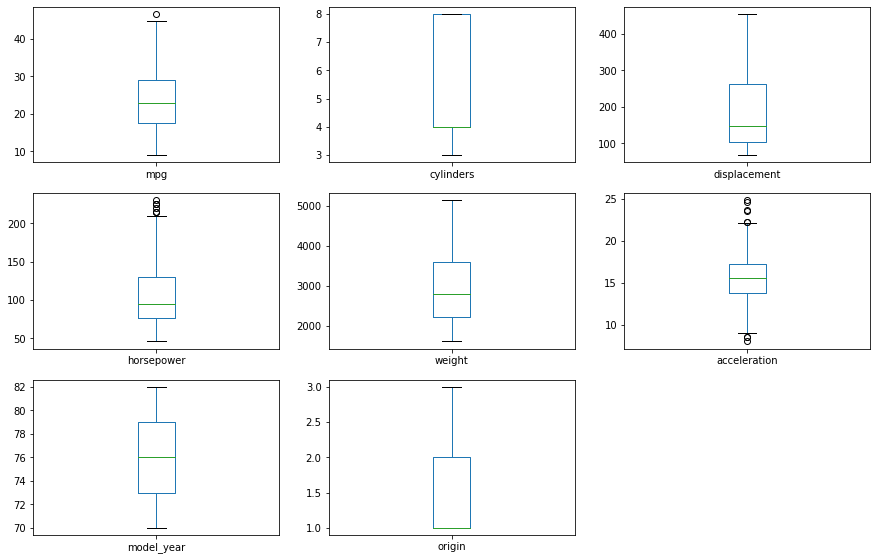

In [20]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
a_mpg.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

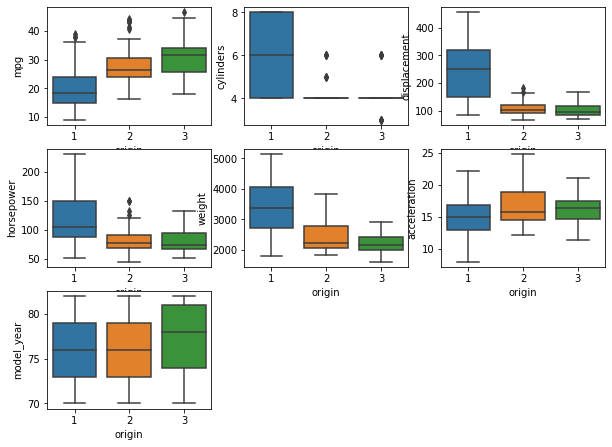

In [21]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires Loan_Status wise
figure(num=None, figsize=(10,10))
for column_index, column in enumerate(a_mpg.columns):
    if column == 'origin':
        continue
    plt.subplot(4, 3, column_index+1)
    sns.boxplot(x='origin', y=column, data=a_mpg)

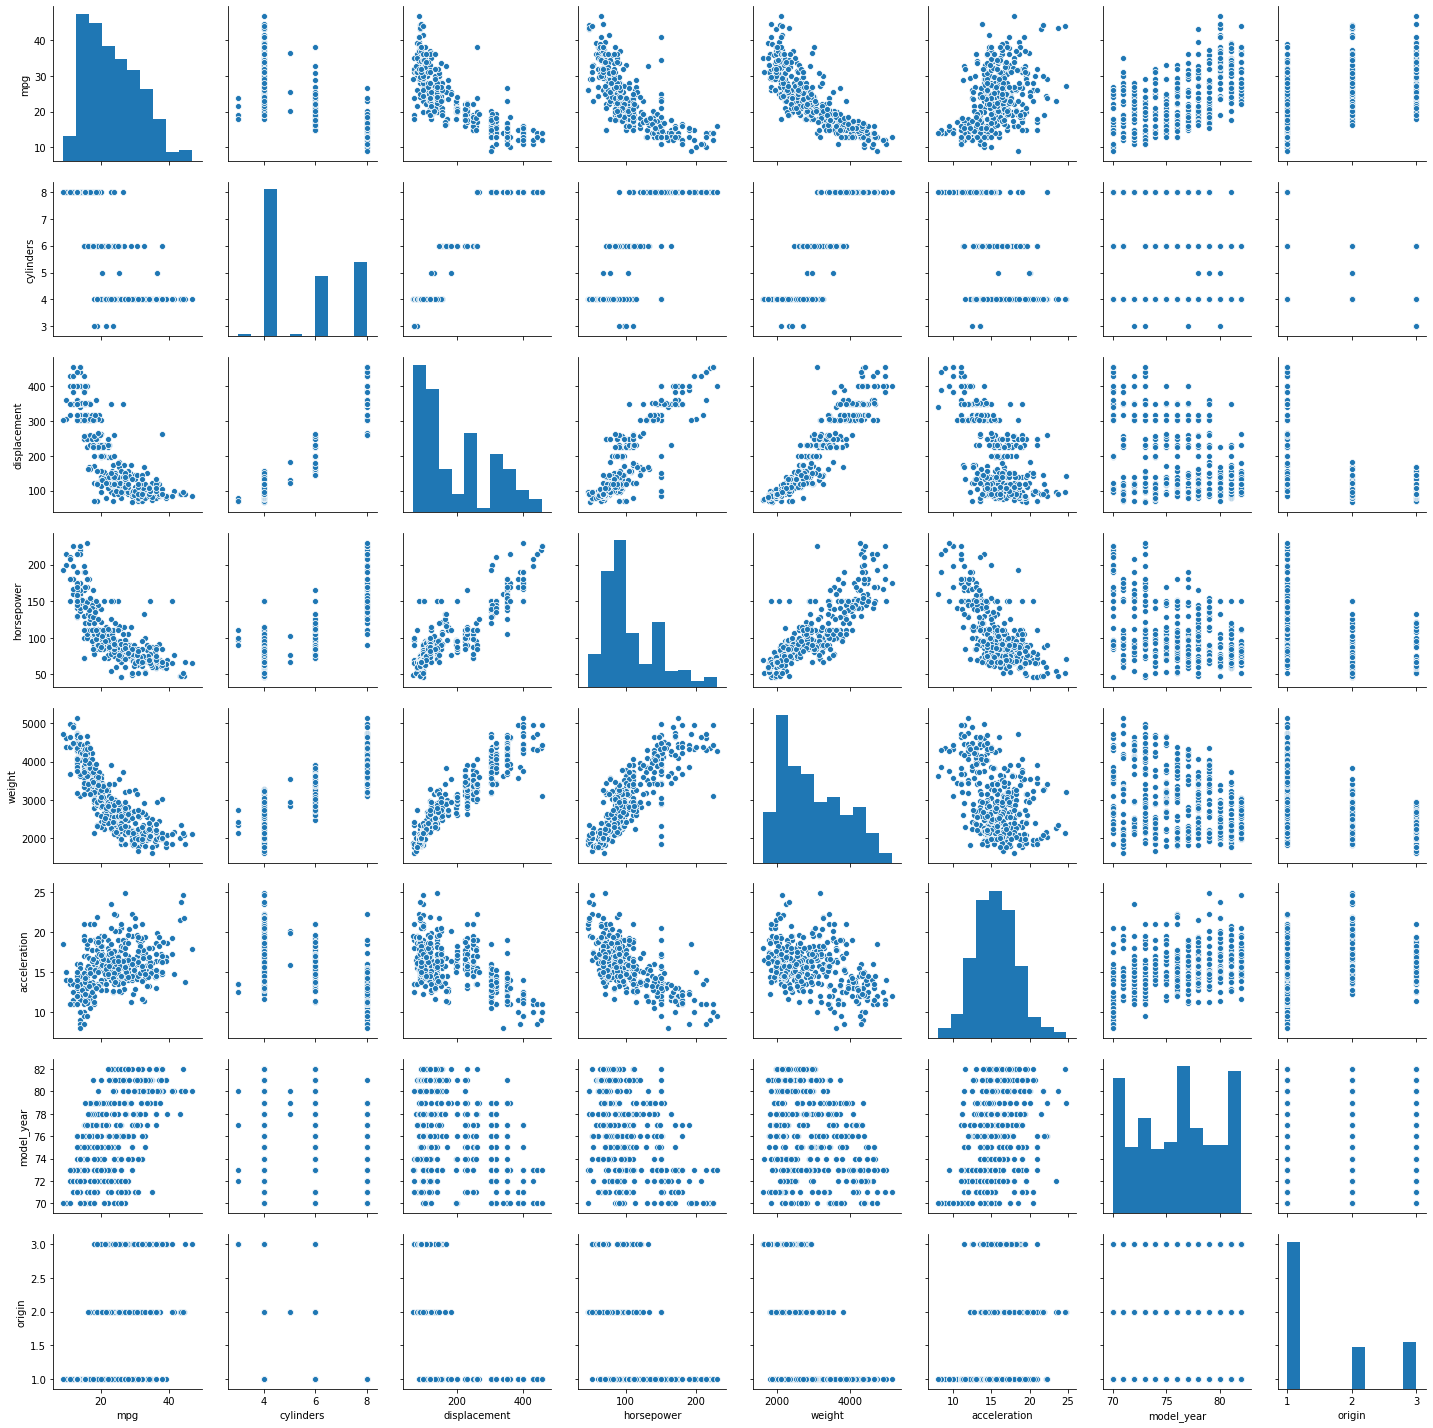

In [22]:
# pair plot to see the scatter of data
sns.pairplot(a_mpg)

###### Manipulating data before bulding the model

In [23]:
#checking skewness
a_mpg.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.033003
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.923776
dtype: float64

In [24]:
for col in a_mpg.columns:
    if a_mpg.skew().loc[col]>0.55:
        a_mpg[col]=np.power(a_mpg[col],1/4)
a_mpg.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.347612
horsepower      0.510915
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.777936
dtype: float64

In [25]:
# dividing dataset into input values 'x' and output value 'y'
x = a_mpg.drop(['mpg'],axis=1)
print('x dataset\n',x.head(),'\n')
y=a_mpg['mpg']
print('y datase\n',y.sample(5))
print(x.shape)
print(y.shape)

x dataset
    cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8      4.185859    3.376648  3504.0          12.0          70   
1          8      4.325308    3.584025  3693.0          11.5          70   
2          8      4.222861    3.499636  3436.0          11.0          70   
3          8      4.175595    3.499636  3433.0          12.0          70   
4          8      4.168710    3.439791  3449.0          10.5          70   

   origin  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0   

y datase
 3      16.0
386    25.0
278    31.5
38     14.0
251    20.2
Name: mpg, dtype: float64
(398, 7)
(398,)


In [26]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

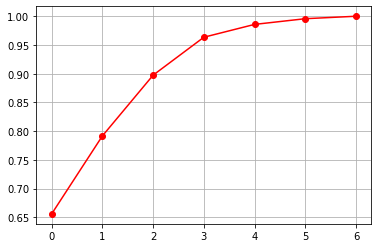

In [27]:
# using pca to find out the variance ratio for dimensionality-reduction
pca=PCA()
train_x=pca.fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

we will not use pca for dimensionality-reduction since this does'nt have much effect

###### Bulding and comparing multipe regression model, to find out the best model

In [28]:
#creating models array with all the model
Models=[('Ridge',Ridge()),('GradientBoostingRegressor',GradientBoostingRegressor(random_state=5)),('ElasticNet',ElasticNet()),
        ('Lasso',Lasso(random_state=29)),('SGDRegressor',SGDRegressor()),('DecisionTreeRegressor',DecisionTreeRegressor(random_state=5)),
        ('KNeighborsRegressor',KNeighborsRegressor()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('LinearRegression',LinearRegression()),('SVR',SVR())]

In [29]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
Model_array=[]
Random_state=[]
Max_r2score_array=[]
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [30]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
7,RandomForestRegressor,0.927783,27
1,GradientBoostingRegressor,0.927377,27
9,SVR,0.917701,19
6,KNeighborsRegressor,0.908467,14
5,DecisionTreeRegressor,0.895167,40
4,SGDRegressor,0.893108,91
0,Ridge,0.892886,91
8,LinearRegression,0.892742,91
3,Lasso,0.861942,91
2,ElasticNet,0.843579,19


###### Conclusion
On basis of r2 score RandomForestRegressor model is performing the best with maximum r2 score, closely followed by GradientBoostingRegressor model

In [31]:
# loop to find out the cross_val_score for r2 of all the model in models array
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=5)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='r2')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [32]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
1,GradientBoostingRegressor,0.741642,0.169058
7,RandomForestRegressor,0.713575,0.178489
6,KNeighborsRegressor,0.707698,0.242331
9,SVR,0.675726,0.327492
0,Ridge,0.621891,0.255591
4,SGDRegressor,0.621087,0.261755
8,LinearRegression,0.620753,0.254929
3,Lasso,0.574380,0.417400
5,DecisionTreeRegressor,0.563468,0.258633
2,ElasticNet,0.548032,0.428737


###### Conclusion
On basis of cross val score GradientBoostingRegressor model is performing the best with maximum cross val score.

###### On basis of our compression of r2 and Cross val score i choose GradientBoostingRegressor model since it performing best on given data

In [33]:
#using grid search to improve result for GradientBoostingRegressor model
kfoldr =KFold(n_splits=10,random_state=5)
param_grid={'max_depth':[2,3,4],'max_features':['auto','sqrt'],'min_samples_split':[2,3,4],
            'n_estimators':[50,100,200],'min_samples_leaf':[6,7,8,9]}
mod=GradientBoostingRegressor()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='r2',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [34]:
grid_result.best_score_

0.7652921363227073

In [35]:
grid_result.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 9,
 'min_samples_split': 4,
 'n_estimators': 200}

In [36]:
grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
# final model
gbr=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=27,shuffle=True)
kfoldr =KFold(n_splits=10,random_state=5)
gbr.fit(train_x,train_y)
pred_r=gbr.predict(test_x)
score_r=cross_val_score(gbr,x,y,cv=kfoldr,scoring='r2').mean()

print('Model score',gbr.score(train_x,train_y),'\n')
print('R2 score of model is :' ,r2_score(test_y,pred_r),'\n')
print('The mean of cross_val_score for the model is:',score_r,'\n')

print('Mean absolute error for model is : ',mean_absolute_error(test_y,pred_r),'\n')
print('Mean squared error for model is : ',mean_squared_error(test_y,pred_r),'\n')
print('Root mean squared error for model is : ',np.sqrt(mean_squared_error(test_y,pred_r)),'\n')

Model score 0.9622455759951027 

R2 score of model is : 0.9110537429520432 

The mean of cross_val_score for the model is: 0.7467153070787641 

Mean absolute error for model is :  1.7767227389712694 

Mean squared error for model is :  6.362792734489851 

Root mean squared error for model is :  2.5224576774427456 



In [38]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 15 Enable Auto MPG Data Set.csv')

In [39]:
# saving the model using pickle.
joblib.dump(gbr,'gbr_Project 15 Enable Auto MPG Data Set.pkl')

['gbr_Project 15 Enable Auto MPG Data Set.pkl']